# Chapter 3: Association Rules 

## Import required packages

In [2]:
from pathlib import Path

#import heapq
#from collections import defaultdict

import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# from surprise import Dataset, Reader, KNNBasic
# from surprise.model_selection import train_test_split

# import dmba

%matplotlib inline

In [3]:
# Load and preprocess data set 
fp_df = pd.read_csv('Faceplate.csv')
fp_df.set_index('Transaction', inplace=True)
fp_df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Red,White,Blue,Orange,Green,Yellow
Transaction,,,,,,
1,1,1,0,0,1,0
2,0,1,0,1,0,0
3,0,1,1,0,0,0
4,1,1,0,1,0,0
5,1,0,1,0,0,0
6,0,1,1,0,0,0
7,1,0,1,0,0,0
8,1,1,1,0,1,0
9,1,1,1,0,0,0


In [4]:
# create frequent itemsets
itemsets = apriori(fp_df, min_support=0.2, use_colnames=True)

# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules.sort_values(by=['support'], ascending=False).head(6)

print(rules.sort_values(by=['support'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction'])
      .head(6))

  antecedents consequents  support  confidence      lift  leverage  \
0     (White)       (Red)      0.4    0.571429  0.952381     -0.02   
1       (Red)     (White)      0.4    0.666667  0.952381     -0.02   
2      (Blue)       (Red)      0.4    0.666667  1.111111      0.04   
3       (Red)      (Blue)      0.4    0.666667  1.111111      0.04   
5     (White)      (Blue)      0.4    0.571429  0.952381     -0.02   
6      (Blue)     (White)      0.4    0.666667  0.952381     -0.02   

   zhangs_metric  
0      -0.142857  
1      -0.111111  
2       0.250000  
3       0.250000  
5      -0.142857  
6      -0.111111  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/haishuai/Library/Python/3.7/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [5]:
# filter to get rules with single consequents only
rules[[len(c) == 1 for c in rules.consequents]].sort_values(by=['lift'], ascending=False).head(6)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,"(White, Red)",(Green),0.4,0.2,0.2,0.5,2.500000,0.12,1.6,1.000
4,(Green),(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500
13,"(White, Green)",(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500
7,(Orange),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375
8,(Green),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375
14,"(Red, Green)",(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375


The apriori method accepts sparse data frames as well. If we convert the original data frame to sparse format, we can see that the memory requirements go down to 40%. The `fill_value` argument informs the `to_sparse` method here which fields to ignore in each transaction.

In [6]:
# Convert data set into a sparse data frame
sparse_df = fp_df.astype(pd.SparseDtype(int, fill_value=0))
print('Density {}'.format(sparse_df.sparse.density))

# create frequent itemsets
itemsets = apriori(sparse_df, min_support=0.2, use_colnames=True)

# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False).head(6)

Density 0.4000000000000001


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/haishuai/Library/Python/3.7/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,"(White, Red)",(Green),0.4,0.2,0.2,0.5,2.500000,0.12,1.6,1.000
15,(Green),"(White, Red)",0.2,0.4,0.2,1.0,2.500000,0.12,inf,0.750
4,(Green),(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500
13,"(White, Green)",(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500
7,(Orange),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375
8,(Green),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375


In [8]:
# load dataset
all_books_df = pd.read_csv('CharlesBookClub.csv')

# create the binary incidence matrix
ignore = ['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Related Purchase',
          'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence']
count_books = all_books_df.drop(columns=ignore)
count_books[count_books > 0] = 1

count_books.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


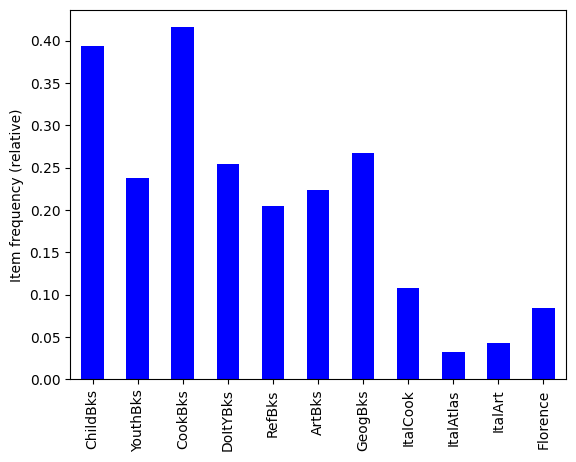

In [9]:
# determine item frequencies
itemFrequency = count_books.sum(axis=0) / len(count_books)

# and plot as histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [10]:
# create frequent itemsets and rules
itemsets = apriori(count_books, min_support=200/4000, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)

print('Number of rules', len(rules))

# Display 25 rules with highest lift
rules.sort_values(by=['lift'], ascending=False).head(25)

pd.set_option('display.precision', 5)
pd.set_option('display.width', 100)
print(rules.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25))
pd.reset_option('display.precision')

Number of rules 81
                      antecedents          consequents  support  confidence     lift  leverage  \
64             (YouthBks, RefBks)  (CookBks, ChildBks)  0.05525     0.68000  2.80992   0.03559   
73             (RefBks, DoItYBks)  (CookBks, ChildBks)  0.06125     0.66216  2.73621   0.03886   
60           (YouthBks, DoItYBks)  (CookBks, ChildBks)  0.06700     0.64891  2.68145   0.04201   
80              (GeogBks, RefBks)  (CookBks, ChildBks)  0.05025     0.61468  2.54000   0.03047   
69            (YouthBks, GeogBks)  (CookBks, ChildBks)  0.06325     0.60526  2.50109   0.03796   
77            (GeogBks, DoItYBks)  (CookBks, ChildBks)  0.06050     0.59901  2.47525   0.03606   
68   (GeogBks, ChildBks, CookBks)           (YouthBks)  0.06325     0.57763  2.42445   0.03716   
70    (CookBks, ChildBks, RefBks)           (DoItYBks)  0.06125     0.59179  2.32301   0.03488   
49            (GeogBks, DoItYBks)           (YouthBks)  0.05450     0.53960  2.26486   0.03044   
6

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/haishuai/Library/Python/3.7/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [11]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules = rules[[len(c) <= 2 for c in rules.antecedents]]
rules = rules[[len(c) == 1 for c in rules.consequents]]

rules.sort_values(by=['lift'], ascending=False).head(10)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
49,"(GeogBks, DoItYBks)",(YouthBks),0.10100,0.23825,0.05450,0.539604,2.264864,0.030437,1.654554,0.621215
33,"(ChildBks, RefBks)",(DoItYBks),0.12825,0.25475,0.07100,0.553606,2.173135,0.038328,1.669490,0.619255
21,"(GeogBks, ChildBks)",(YouthBks),0.14625,0.23825,0.07550,0.516239,2.166797,0.040656,1.574642,0.630734
46,"(GeogBks, CookBks)",(YouthBks),0.15625,0.23825,0.08025,0.513600,2.155719,0.043023,1.566098,0.635399
16,"(YouthBks, ChildBks)",(DoItYBks),0.14750,0.25475,0.08025,0.544068,2.135693,0.042674,1.634563,0.623775
50,"(CookBks, RefBks)",(DoItYBks),0.13975,0.25475,0.07450,0.533095,2.092619,0.038899,1.596148,0.606952
22,"(CookBks, ChildBks)",(DoItYBks),0.24200,0.25475,0.12775,0.527893,2.072198,0.066101,1.578560,0.682613
47,"(YouthBks, GeogBks)",(DoItYBks),0.10450,0.25475,0.05450,0.521531,2.047227,0.027879,1.557573,0.571228
41,"(YouthBks, CookBks)",(DoItYBks),0.16100,0.25475,0.08375,0.520186,2.041948,0.042735,1.553207,0.608190
43,"(YouthBks, RefBks)",(CookBks),0.08125,0.41550,0.06825,0.840000,2.021661,0.034491,3.653125,0.550049
